In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(r'C:\Users\abhay.jamwal\Downloads\movielens-100k-dataset\ml-100k\u.user', sep='|', names=u_cols,encoding='latin-1')

In [4]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(r'C:\Users\abhay.jamwal\Downloads\movielens-100k-dataset\ml-100k\u.data', sep='\t', names=r_cols,encoding='latin-1')

In [5]:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv(r'C:\Users\abhay.jamwal\Downloads\movielens-100k-dataset\ml-100k\u.item', sep='|', names=i_cols,
encoding='latin-1')

In [17]:
items.shape

(1682, 24)

In [6]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [16]:
ratings.head()

,user_id,item_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [15]:
ratings = ratings.rename(columns={'movie_id':'item_id'})

In [20]:
items = items.rename(columns={'movie id':'item_id'})

In [21]:
items.head()

,item_id,movie title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
items.drop(labels=['video release date','IMDb URL','release date'],axis=1,inplace=True)


In [11]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_train = pd.read_csv(r'C:\Users\abhay.jamwal\Downloads\movielens-100k-dataset\ml-100k\ua.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv(r'C:\Users\abhay.jamwal\Downloads\movielens-100k-dataset\ml-100k\ua.test', sep='\t', names=r_cols, encoding='latin-1')
ratings_train.shape, ratings_test.shape

((90570, 4), (9430, 4))

In [23]:
merge = pd.merge(ratings,items, on= 'item_id')

In [34]:
merge = merge.rename(columns={'movie title':'title'})

In [71]:
merge.head()

,user_id,item_id,rating,unix_timestamp,title,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
import seaborn as sns

In [36]:
merge.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [37]:
merge.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [39]:
ratings = pd.DataFrame(merge.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [40]:
ratings['no of ratings'] = pd.DataFrame(merge.groupby('title')['rating'].count())

In [45]:
ratings = ratings.rename(columns={'no of ratings':'no_of_ratings'})
ratings.head()

,rating,no_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


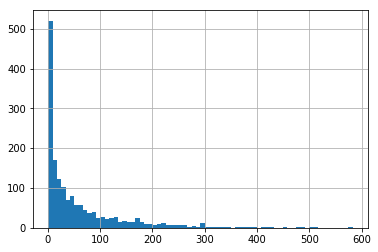

In [47]:
ratings.no_of_ratings.hist(bins = 70)

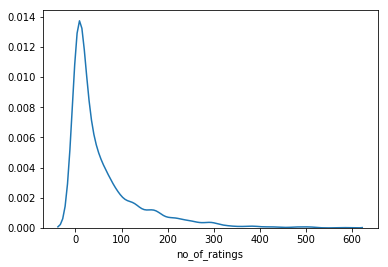

In [54]:
sns.distplot(a = ratings.no_of_ratings,hist=Falsebbb)

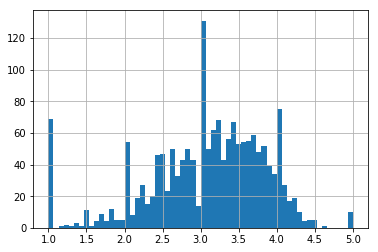

In [48]:
ratings.rating.hist(bins = 60)

In [58]:
ratings.head()

,rating,no_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


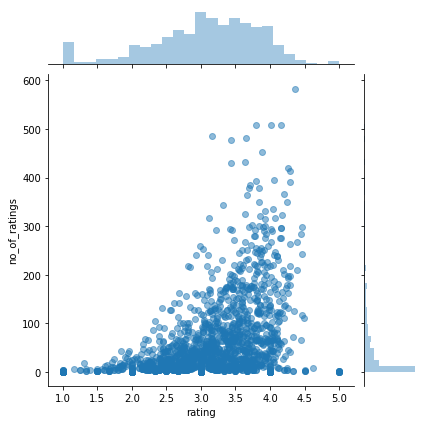

In [57]:
sns.jointplot(x = 'rating', y = 'no_of_ratings',data = ratings,alpha = 0.5)

In [76]:
matdata = merge.pivot_table(index='user_id',columns='title',values='rating')
matdata.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [85]:
ratings.no_of_ratings.sort_values(ascending = False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: no_of_ratings, dtype: int64

In [87]:
ratings.sort_values('no_of_ratings',ascending = False).head()

,rating,no_of_ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [89]:
star_wars_ratings = matdata['Star Wars (1977)']
star_wars_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [93]:
simi_starwar = matdata.corrwith(star_wars_ratings)
simi_starwar.dropna(inplace = True)
simi_starwar.head()

C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [106]:
corr_starwar = pd.DataFrame(simi_starwar,columns=['Correlation'])
corr_starwar.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [108]:
corr_starwar = corr_starwar.join(ratings.no_of_ratings)

In [111]:
corr_starwar.Correlation.sort_values(ascending = False)

title
Hollow Reed (1996)                                                                   1.000000
Man of the Year (1995)                                                               1.000000
Stripes (1981)                                                                       1.000000
Full Speed (1996)                                                                    1.000000
Golden Earrings (1947)                                                               1.000000
Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)    1.000000
Star Wars (1977)                                                                     1.000000
Ed's Next Move (1996)                                                                1.000000
Scarlet Letter, The (1926)                                                           1.000000
Hurricane Streets (1998)                                                             1.000000
Safe Passage (1994)                                   

In [113]:
corr_starwar[corr_starwar.no_of_ratings >= 100].sort_values('Correlation',ascending = False)

,Correlation,no_of_ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115
